In [7]:
!ls

Data parser.ipynb README.md         data              requirements.txt


In [8]:
!pip install -r requirements.txt

     |████████████████████████████████| 11.4 MB 5.5 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 17.9 MB/s eta 0:00:01
     |████████████████████████████████| 15.3 MB 13.2 MB/s eta 0:00:01
     |████████████████████████████████| 60 kB 7.5 MB/s  eta 0:00:01
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)


In [19]:
from collections import *
import matplotlib.pyplot as plt

%matplotlib inline

# Extract a subset of classes with corresponding sub-classes

In [6]:
def format_row(row):
    parent, child = row.split()
    return int(parent), int(child)

with open("data/hierarchy.txt") as inp:
    hier = [format_row(row) for row in inp]
hier[:5]

[(2244783, 2214730),
 (2290533, 2150070),
 (2396640, 73420),
 (2339034, 73420),
 (2110932, 139100)]

In [22]:
counter = Counter([i[0] for i in hier])
mc = counter.most_common(); mc[:5]

[(1000051, 9487),
 (1000054, 3294),
 (1005733, 1510),
 (2381509, 1309),
 (2252220, 921)]

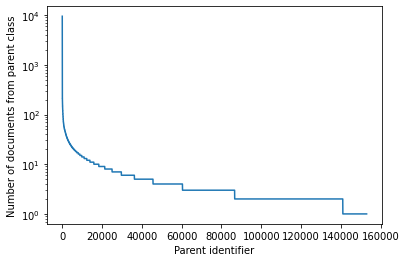

In [31]:
plt.plot(range(len(mc)), [c[1] for c in mc])
plt.yscale("log")
plt.ylabel("Number of documents from parent class")
plt.xlabel("Parent identifier")
plt.show()

Lots of classes have few instances. Let's look at the distribution of number of child classes per parent

In [36]:
parents = [m[0] for m in mc]
for p in parents:
    print(f"Looking for documents with parent {p}")
    children = [h[1] for h in hier if h[0] == p]
    print(len(Counter(children).most_common()))
    break

Looking for documents with parent 1000051
9487


In [38]:
child = Counter([h[1] for h in hier])
child.most_common()

[(2253487, 223),
 (2243317, 115),
 (2264041, 114),
 (2013402, 55),
 (1001029, 53),
 (1002001, 52),
 (1001025, 52),
 (1018917, 52),
 (1018829, 49),
 (1079861, 48),
 (2260596, 47),
 (2156755, 39),
 (274583, 36),
 (1003401, 35),
 (1002266, 34),
 (2335226, 33),
 (2226766, 31),
 (2008325, 27),
 (2290646, 27),
 (2166470, 26),
 (1095981, 26),
 (2179731, 26),
 (2311941, 25),
 (2049711, 25),
 (132032, 25),
 (2140354, 25),
 (2241864, 25),
 (2001205, 25),
 (2176425, 25),
 (15787, 25),
 (2217949, 25),
 (1095954, 24),
 (2024177, 24),
 (2273350, 23),
 (2111342, 23),
 (308812, 23),
 (2397937, 23),
 (2024690, 22),
 (2042721, 22),
 (2074452, 22),
 (2227294, 22),
 (2344616, 22),
 (2041637, 22),
 (49050, 21),
 (2056247, 21),
 (2431748, 21),
 (2094869, 21),
 (2391975, 20),
 (2127616, 20),
 (2301896, 20),
 (2178968, 20),
 (2204711, 19),
 (25461, 19),
 (1001652, 19),
 (2341432, 19),
 (2285613, 19),
 (2129444, 19),
 (2399695, 19),
 (2064865, 19),
 (425936, 19),
 (2434576, 19),
 (2277457, 19),
 (2140347, 19),

In [ ]:
num_parents = 5
extracted_hierarchy = {}
for i in range(num_parents):
    